In this plot, I am incorporating the SWE (26) and SD(25) at snotel sites to calculte the density towards inverting UAVSAR SWE. Pixel values were all lost at the beginning of snow melt period and at lower elevation region

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#read the SNOTEL recorded SWE and SD data
ban_SWE = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Banner_Snotel/312_26_WATERYEAR=2021.csv', 
                            skiprows = 3, index_col=['Date'], usecols=['Date','WTEQ.I-1 (in) '], na_values = -99.9)
ban_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Banner_Snotel/312_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)

bog_SWE = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Bogus_Snotel/978_26_WATERYEAR=2021.csv',
                            skiprows = 3, index_col=['Date'], usecols=['Date','WTEQ.I-1 (in) '], na_values = -99.9)
bog_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Bogus_Snotel/978_25_WATERYEAR=2021.csv',
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9) 

MCS_SWE = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/MCS_Snotel/637_26_WATERYEAR=2021.csv',
                            skiprows = 3, index_col=['Date'], usecols=['Date','WTEQ.I-1 (in) '], na_values = -99.9)
MCS_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/MCS_Snotel/637_25_WATERYEAR=2021.csv',
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)

In [3]:
#concatenate the SWE and SD dataframes for each sites
ban = pd.concat([ban_SWE, ban_SD], axis=1)
bog = pd.concat([bog_SWE, bog_SD], axis=1)
MCS = pd.concat([MCS_SWE, MCS_SD], axis=1)

In [4]:
#Set the index to datetime format
ban.index = pd.to_datetime(ban.index)
bog.index = pd.to_datetime(bog.index)
MCS.index = pd.to_datetime(MCS.index)

In [5]:
#change the units of the SWE and SD data to ventimeter
ban['ban_SD(cm)'] = ban['SNWD.I-1 (in) '] * 2.54
ban['ban_SWE(cm)'] = ban['WTEQ.I-1 (in) '] * 2.54
ban['ban_SDen(cm)'] = ban['ban_SWE(cm)']/ban['ban_SD(cm)']

bog['bog_SD(cm)'] = bog['SNWD.I-1 (in) '] * 2.54
bog['bog_SWE(cm)'] = bog['WTEQ.I-1 (in) '] * 2.54
bog['bog_SDen(cm)'] = bog['bog_SWE(cm)']/bog['bog_SD(cm)']

MCS['MCS_SD(cm)'] = MCS['SNWD.I-1 (in) '] * 2.54
MCS['MCS_SWE(cm)'] = MCS['WTEQ.I-1 (in) '] * 2.54
MCS['MCS_SDen(cm)'] = MCS['MCS_SWE(cm)']/MCS['MCS_SD(cm)']



In [6]:
#subset snotel data to the date range of the UAVSAR data
ban = ban.loc['2021-01-01':'2021-04-30']
bog= bog.loc['2021-01-01':'2021-04-30']
MCS = MCS.loc['2021-01-01':'2021-04-30']

In [7]:
#Concat the snotel dataframes
snotel_data = pd.concat([ban, bog, MCS], axis=1).drop(['WTEQ.I-1 (in) ','SNWD.I-1 (in) '], axis=1)
snotel_data.head()

,ban_SD(cm),ban_SWE(cm),ban_SDen(cm),bog_SD(cm),bog_SWE(cm),bog_SDen(cm),MCS_SD(cm),MCS_SWE(cm),MCS_SDen(cm)
Date,,,,,,,,,
2021-01-01,99.06,22.352,0.225641,101.60,26.924,0.265000,116.84,28.956,0.247826
2021-01-02,99.06,22.352,0.225641,99.06,26.924,0.271795,111.76,29.210,0.261364
2021-01-03,101.60,23.114,0.227500,101.60,27.686,0.272500,114.30,29.718,0.260000
2021-01-04,111.76,24.130,0.215909,114.30,29.972,0.262222,137.16,33.528,0.244444
2021-01-05,137.16,27.940,0.203704,132.08,32.766,0.248077,147.32,35.814,0.243103


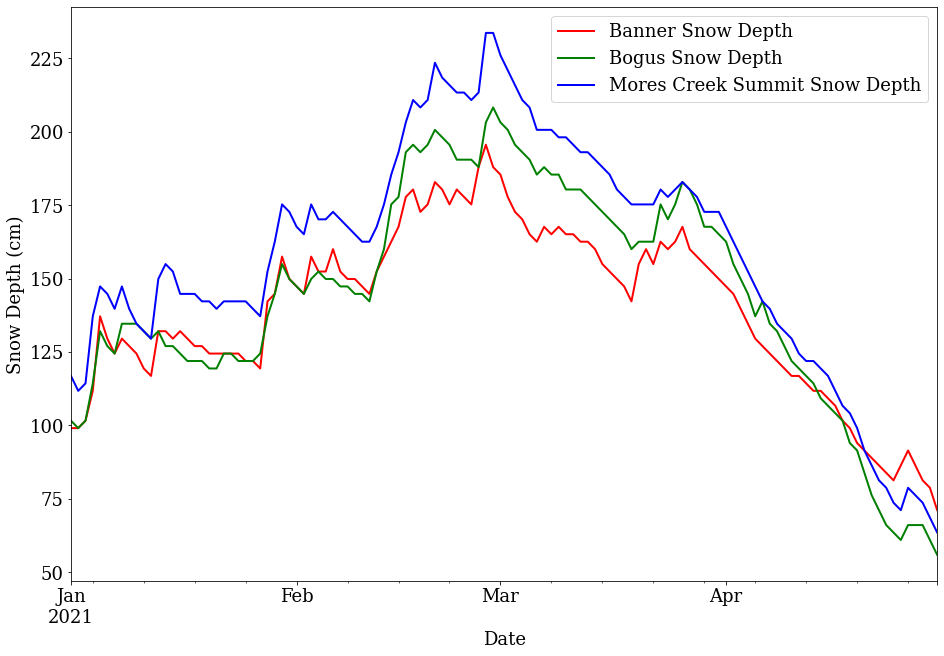

In [9]:
#plot the snow depth for all sites

# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

snotel_data['ban_SD(cm)'].plot(ax=ax, color='red', linewidth=2, label='Banner Snow Depth')
snotel_data['bog_SD(cm)'].plot(ax=ax, color='green', linewidth=2, label='Bogus Snow Depth')
snotel_data['MCS_SD(cm)'].plot(ax=ax, color='blue', linewidth=2, label='Mores Creek Summit Snow Depth')

ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend()


plt.show()


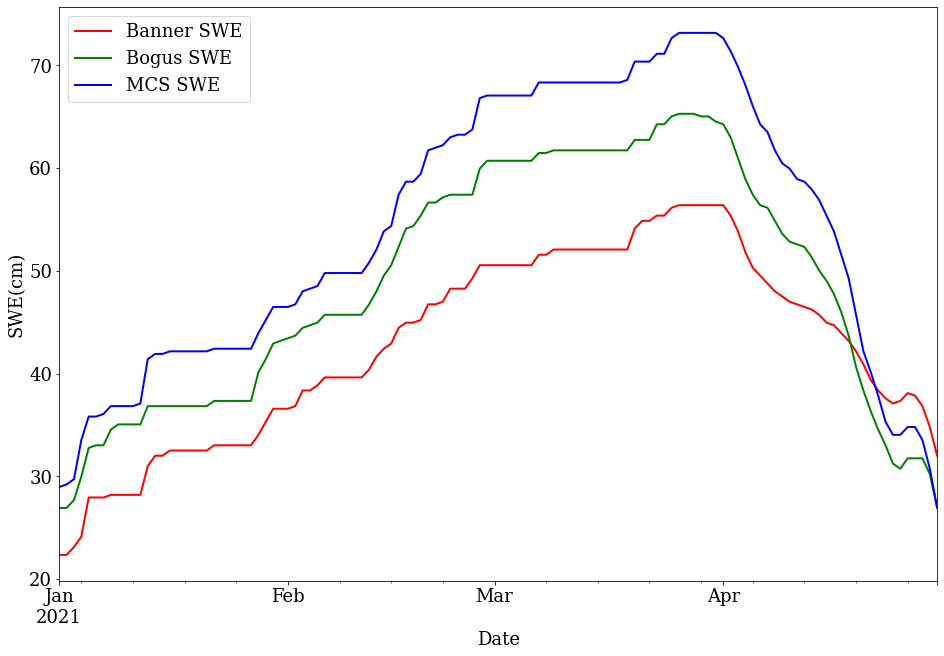

In [10]:
#plot the SWE for all sites

# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

snotel_data['ban_SWE(cm)'].plot(ax=ax, color='red', linewidth=2, label='Banner SWE')
snotel_data['bog_SWE(cm)'].plot(ax=ax, color='green', linewidth=2, label='Bogus SWE')
snotel_data['MCS_SWE(cm)'].plot(ax=ax, color='blue', linewidth=2, label='MCS SWE')

ax.set_ylabel('SWE(cm)')
ax.set_xlabel('Date')
ax.legend()


plt.show()

Two plots of varying scale. Let's plot the snow depth and SWE on a figure at same layout. Although the scale of the variables are different, I want to compare pattern of SD and SWE change.

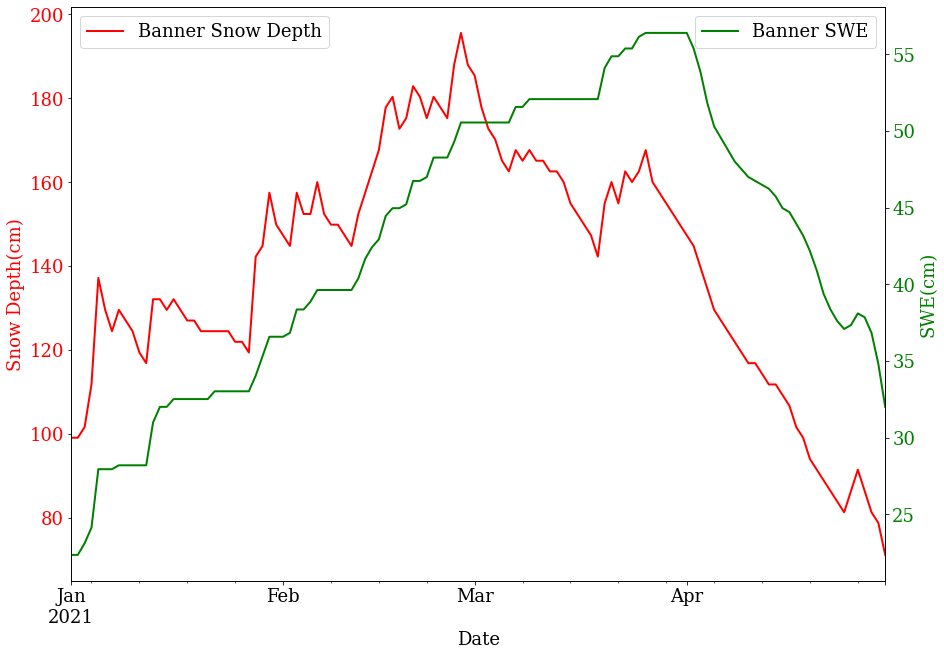

In [12]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

ax.set_xlabel('Date')
ax.set_ylabel('Snow Depth(cm)', color = 'red')
snotel_data['ban_SD(cm)'].plot(ax=ax, color='red', linewidth=2, label='Banner Snow Depth')
ax.tick_params(axis='y', labelcolor='red')
ax.legend(loc = 'upper left')

#initiate a second axes that shares the same x-axis
ax2 = ax.twinx()

ax2.set_ylabel('SWE(cm)', color='green')
snotel_data['ban_SWE(cm)'].plot(ax=ax2, color='green', linewidth=2, label='Banner SWE')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc = 'best')

plt.show()

In [13]:
#find the snotel data at the beginning of uavsar to use as the base value for the uavsar timeseries
snotel_data.loc['2021-01-15']

ban_SD(cm)      129.540000
ban_SWE(cm)      32.004000
ban_SDen(cm)      0.247059
bog_SD(cm)      127.000000
bog_SWE(cm)      36.830000
bog_SDen(cm)      0.290000
MCS_SD(cm)      152.400000
MCS_SWE(cm)      41.910000
MCS_SDen(cm)      0.275000
Name: 2021-01-15 00:00:00, dtype: float64

In [14]:
#Create a dataframe of start and end dates for each interferograms

int_dates = [[1, '01-01-2021', '01-15-2021', 129.54, 127.0, 152.4],
            [2, '01-15-2021', '01-20-2021', -6.169, 1.667, -3.383], 
            [3, '01-20-2021', '01-27-2021', 1.515, -3.325, 1.687], 
            [4, '01-27-2021', '02-03-2021', 12.080, 10.637, 9.507],
            [5, '02-03-2021', '02-10-2021', 10.248, 10.393, 2.608],
            [6, '02-10-2021', '03-03-2021', np.nan, np.nan, np.nan], 
            [7, '03-03-2021', '03-10-2021', 4.536,2.094, 1.915],
            [8, '03-10-2021', '03-16-2021', 3.134, 1.067,4.334], 
            [9, '03-16-2021', '03-22-2021', np.nan, -0.296, -6.845]]

uavsar_SD_df = pd.DataFrame(int_dates, columns= ['inteferograms', 'start_date', 'end_date', 'SnowDepth_Banner', 'SnowDepth_Bogus', 'SnowDepth_MCS']).set_index('end_date')

uavsar_SD_df

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS
end_date,,,,,
01-15-2021,1,01-01-2021,129.540,127.000,152.400
01-20-2021,2,01-15-2021,-6.169,1.667,-3.383
01-27-2021,3,01-20-2021,1.515,-3.325,1.687
02-03-2021,4,01-27-2021,12.080,10.637,9.507
02-10-2021,5,02-03-2021,10.248,10.393,2.608
03-03-2021,6,02-10-2021,NaN,NaN,NaN
03-10-2021,7,03-03-2021,4.536,2.094,1.915
03-16-2021,8,03-10-2021,3.134,1.067,4.334
03-22-2021,9,03-16-2021,NaN,-0.296,-6.845


In [15]:
# Break the dataframe into two with the beginning of the second beginning at interferogram with large baseline(consistent NaN) (03-03-2021) 
uavsar_SD_df_dry = uavsar_SD_df['01-15-2021':'02-10-2021']
#set the index to datetime format
uavsar_SD_df_dry.index = pd.to_datetime(uavsar_SD_df_dry.index)

uavsar_SD_df_wet = uavsar_SD_df['03-03-2021':'03-22-2021']
#set the index to datetime format
uavsar_SD_df_wet.index = pd.to_datetime(uavsar_SD_df_wet.index)

In [16]:
#create a cum sum of snow depth
uavsar_SD_df_dry.loc[:,'SnowDepth_Banner_cumsum'] = uavsar_SD_df_dry.loc[:, 'SnowDepth_Banner'].cumsum()
uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus_cumsum'] = uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus'].cumsum()
uavsar_SD_df_dry.loc[:,'SnowDepth_MCS_cumsum'] = uavsar_SD_df_dry.loc[:,'SnowDepth_MCS'].cumsum()

uavsar_SD_df_dry

/tmp/ipykernel_46697/3938119463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_dry.loc[:,'SnowDepth_Banner_cumsum'] = uavsar_SD_df_dry.loc[:, 'SnowDepth_Banner'].cumsum()
/tmp/ipykernel_46697/3938119463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus_cumsum'] = uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus'].cumsum()
/tmp/ipykernel_46697/3938119463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum
end_date,,,,,,,,
2021-01-15,1,01-01-2021,129.540,127.000,152.400,129.540,127.000,152.400
2021-01-20,2,01-15-2021,-6.169,1.667,-3.383,123.371,128.667,149.017
2021-01-27,3,01-20-2021,1.515,-3.325,1.687,124.886,125.342,150.704
2021-02-03,4,01-27-2021,12.080,10.637,9.507,136.966,135.979,160.211
2021-02-10,5,02-03-2021,10.248,10.393,2.608,147.214,146.372,162.819


In [17]:
#Get snotel value at the date with no interferogram (NAN)for wet snow
snotel_data.loc['2021-03-03']

ban_SD(cm)      172.720000
ban_SWE(cm)      50.546000
ban_SDen(cm)      0.292647
bog_SD(cm)      195.580000
bog_SWE(cm)      60.706000
bog_SDen(cm)      0.310390
MCS_SD(cm)      215.900000
MCS_SWE(cm)      67.056000
MCS_SDen(cm)      0.310588
Name: 2021-03-03 00:00:00, dtype: float64

In [18]:
#Replace the nan with snotel value at that date

uavsar_SD_df_wet.loc['03-03-2021', 'SnowDepth_Banner'] = snotel_data.loc['2021-03-03', 'ban_SD(cm)']
uavsar_SD_df_wet.loc['03-03-2021', 'SnowDepth_Bogus'] = snotel_data.loc['2021-03-03', 'bog_SD(cm)']
uavsar_SD_df_wet.loc['03-03-2021', 'SnowDepth_MCS'] = snotel_data.loc['2021-03-03', 'MCS_SD(cm)']
uavsar_SD_df_wet

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS
end_date,,,,,
2021-03-03,6,02-10-2021,172.720,195.580,215.900
2021-03-10,7,03-03-2021,4.536,2.094,1.915
2021-03-16,8,03-10-2021,3.134,1.067,4.334
2021-03-22,9,03-16-2021,NaN,-0.296,-6.845


In [19]:
#create a cum sum of snow depth
uavsar_SD_df_wet['SnowDepth_Banner_cumsum'] = uavsar_SD_df_wet['SnowDepth_Banner'].cumsum()
uavsar_SD_df_wet['SnowDepth_Bogus_cumsum'] = uavsar_SD_df_wet['SnowDepth_Bogus'].cumsum()
uavsar_SD_df_wet['SnowDepth_MCS_cumsum'] = uavsar_SD_df_wet['SnowDepth_MCS'].cumsum()
uavsar_SD_df_wet

/tmp/ipykernel_46697/4062883003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_wet['SnowDepth_Banner_cumsum'] = uavsar_SD_df_wet['SnowDepth_Banner'].cumsum()
/tmp/ipykernel_46697/4062883003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_wet['SnowDepth_Bogus_cumsum'] = uavsar_SD_df_wet['SnowDepth_Bogus'].cumsum()
/tmp/ipykernel_46697/4062883003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum
end_date,,,,,,,,
2021-03-03,6,02-10-2021,172.720,195.580,215.900,172.720,195.580,215.900
2021-03-10,7,03-03-2021,4.536,2.094,1.915,177.256,197.674,217.815
2021-03-16,8,03-10-2021,3.134,1.067,4.334,180.390,198.741,222.149
2021-03-22,9,03-16-2021,NaN,-0.296,-6.845,NaN,198.445,215.304


In [20]:
#concat the two dataframes(dry and wet)
uavsar_SD_df_conc = pd.concat([uavsar_SD_df_dry, uavsar_SD_df_wet])
uavsar_SD_df_conc

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum
end_date,,,,,,,,
2021-01-15,1,01-01-2021,129.540,127.000,152.400,129.540,127.000,152.400
2021-01-20,2,01-15-2021,-6.169,1.667,-3.383,123.371,128.667,149.017
2021-01-27,3,01-20-2021,1.515,-3.325,1.687,124.886,125.342,150.704
2021-02-03,4,01-27-2021,12.080,10.637,9.507,136.966,135.979,160.211
2021-02-10,5,02-03-2021,10.248,10.393,2.608,147.214,146.372,162.819
2021-03-03,6,02-10-2021,172.720,195.580,215.900,172.720,195.580,215.900
2021-03-10,7,03-03-2021,4.536,2.094,1.915,177.256,197.674,217.815
2021-03-16,8,03-10-2021,3.134,1.067,4.334,180.390,198.741,222.149
2021-03-22,9,03-16-2021,NaN,-0.296,-6.845,NaN,198.445,215.304


In [25]:
#concatenate the snotel_data and Uavsar_SD_df_conc
uavsar_snotel = pd.concat([uavsar_SD_df_conc, snotel_data], join = 'inner',axis=1).drop(['SnowDepth_Banner', 'SnowDepth_Bogus', 'SnowDepth_MCS'], axis=1)
uavsar_snotel

,inteferograms,start_date,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum,ban_SD(cm),ban_SWE(cm),ban_SDen(cm),bog_SD(cm),bog_SWE(cm),bog_SDen(cm),MCS_SD(cm),MCS_SWE(cm),MCS_SDen(cm)
2021-01-15,1,01-01-2021,129.540,127.000,152.400,129.54,32.004,0.247059,127.00,36.830,0.290000,152.40,41.910,0.275000
2021-01-20,2,01-15-2021,123.371,128.667,149.017,124.46,32.512,0.261224,119.38,36.830,0.308511,142.24,42.164,0.296429
2021-01-27,3,01-20-2021,124.886,125.342,150.704,119.38,33.020,0.276596,124.46,37.338,0.300000,137.16,42.418,0.309259
2021-02-03,4,01-27-2021,136.966,135.979,160.211,157.48,38.354,0.243548,149.86,44.450,0.296610,175.26,48.006,0.273913
2021-02-10,5,02-03-2021,147.214,146.372,162.819,147.32,39.624,0.268966,144.78,45.720,0.315789,162.56,49.784,0.306250
2021-03-03,6,02-10-2021,172.720,195.580,215.900,172.72,50.546,0.292647,195.58,60.706,0.310390,215.90,67.056,0.310588
2021-03-10,7,03-03-2021,177.256,197.674,217.815,165.10,52.070,0.315385,180.34,61.722,0.342254,198.12,68.326,0.344872
2021-03-16,8,03-10-2021,180.390,198.741,222.149,152.40,52.070,0.341667,170.18,61.722,0.362687,185.42,68.326,0.368493
2021-03-22,9,03-16-2021,NaN,198.445,215.304,154.94,54.864,0.354098,162.56,62.738,0.385937,175.26,70.358,0.401449


The above dataframe contains many useful columns such as the uavsar-inverted SD, snotel snow depth, SWE and Density for each sites. Let's calculate the Uavsar SWE using the uavsar snow depth (column: SnowDepth_site_cumsum) * snotel density (column: site_SDen)

In [27]:
uavsar_snotel['SWE_Banner_cumsum'] = uavsar_snotel['SnowDepth_Banner_cumsum'] * uavsar_snotel['ban_SDen(cm)']
uavsar_snotel['SWE_Bogus_cumsum'] = uavsar_snotel['SnowDepth_Bogus_cumsum'] * uavsar_snotel['bog_SDen(cm)']
uavsar_snotel['SWE_MCS_cumsum'] = uavsar_snotel['SnowDepth_MCS_cumsum'] * uavsar_snotel['MCS_SDen(cm)']

Let's plot the uavsar-SWE and snotel-SWE

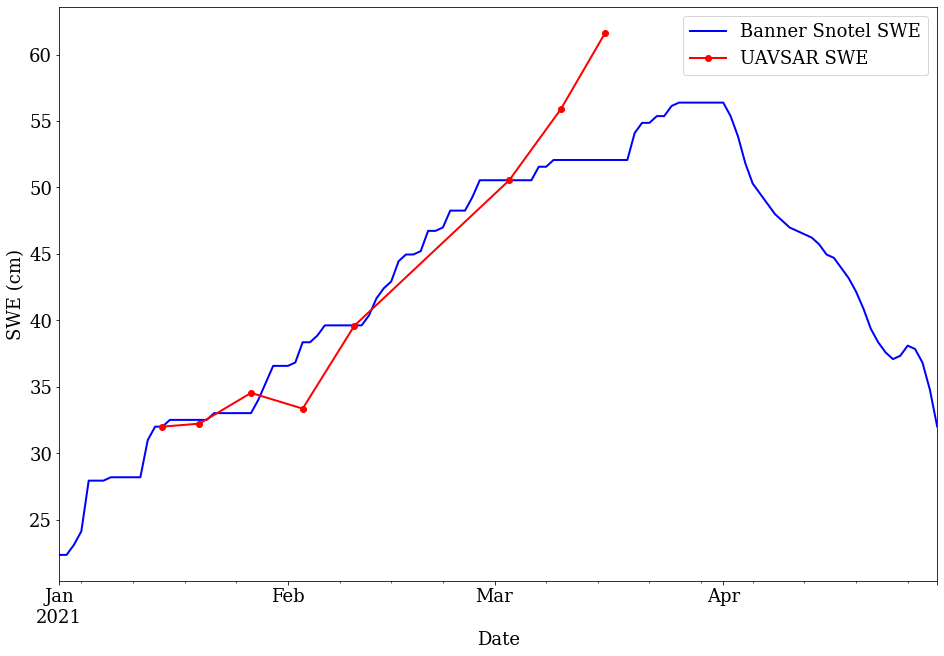

In [32]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data['ban_SWE(cm)'].plot(ax=ax, color='blue', linewidth=2, label='Banner Snotel SWE')
uavsar_snotel['SWE_Banner_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR SWE', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
# ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('SWE (cm)')
ax.set_xlabel('Date')
ax.legend(loc='best')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)

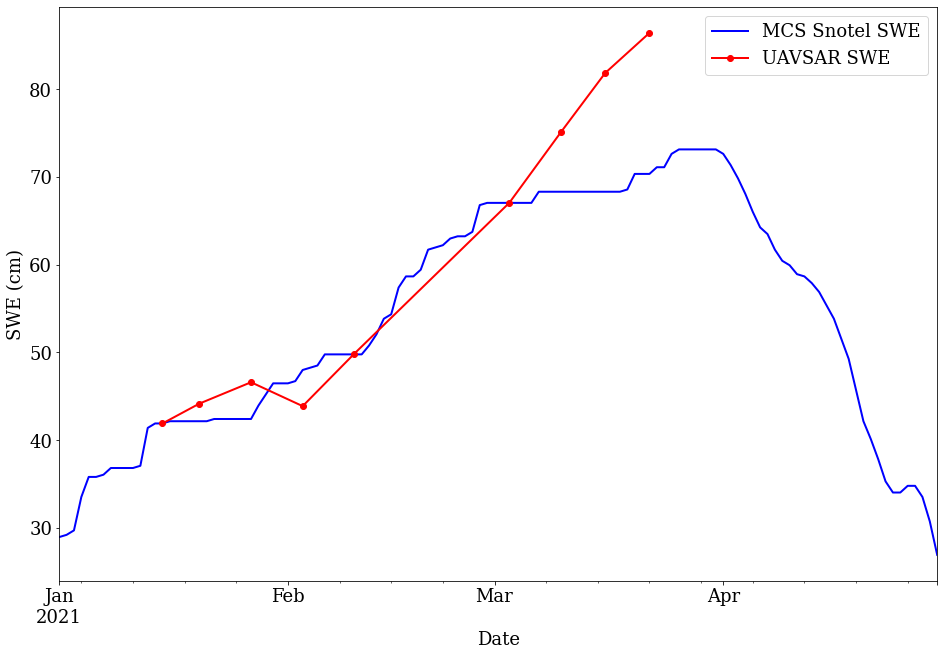

In [33]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data['MCS_SWE(cm)'].plot(ax=ax, color='blue', linewidth=2, label='MCS Snotel SWE')
uavsar_snotel['SWE_MCS_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR SWE', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
# ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('SWE (cm)')
ax.set_xlabel('Date')
ax.legend(loc='best')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)

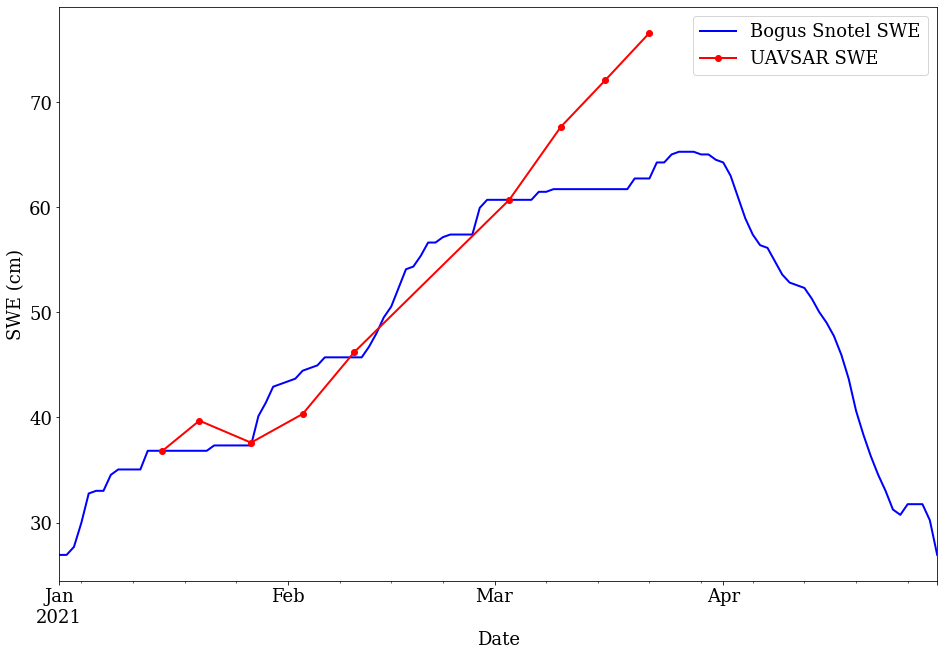

In [34]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data['bog_SWE(cm)'].plot(ax=ax, color='blue', linewidth=2, label='Bogus Snotel SWE')
uavsar_snotel['SWE_Bogus_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR SWE', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
# ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('SWE (cm)')
ax.set_xlabel('Date')
ax.legend(loc='best')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)